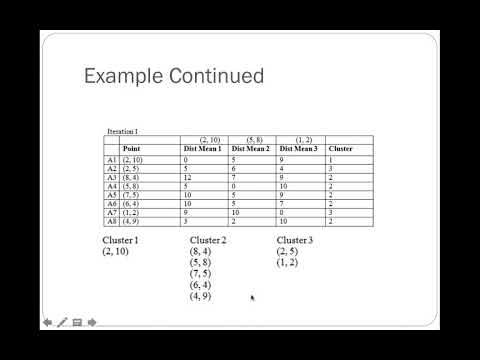

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('_S5tvagaQRU')


So far, the classification and regression problems that you have learned are considered supervised learning, where you provide the correct answers to the machine. Another type of ML problems are unsupervised learning, where you do not provide the correct answers, and let the machine discover any structure or patterns. One classic problem is clustering, an automatic grouping of data points according to their similarities to each other. For example, say we have a scatterplot of 20 points as follows:

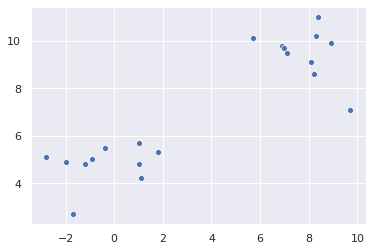

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
x = [-2,8.2,-0.4,1,5.7,1,9.7,8.3,-2.8,8.9,-1.7,8.1,1.1,1.8,6.9,-1.2,7,8.4,7.1,-0.9]
y = [4.9,8.6,5.5,5.7,10.1,4.8,7.1,10.2,5.1,9.9,2.7,9.1,4.2,5.3,9.8,4.8,9.7,11,9.5,5]
sns.scatterplot(x,y)

In [9]:
np.around(X.T,decimals=1)

array([[-2. ,  8.2, -0.4,  1. ,  5.7,  1. ,  9.7,  8.3, -2.8,  8.9, -1.7,
         8.1,  1.1,  1.8,  6.9, -1.2,  7. ,  8.4,  7.1, -0.9],
       [ 4.9,  8.6,  5.5,  5.7, 10.1,  4.8,  7.1, 10.2,  5.1,  9.9,  2.7,
         9.1,  4.2,  5.3,  9.8,  4.8,  9.7, 11. ,  9.5,  5. ]])

In [14]:
"[ 4.9,  8.6,  5.5,  5.7, 10.1,  4.8,  7.1, 10.2,  5.1,  9.9,  2.7,9.1,  4.2,  5.3,  9.8,  4.8,  9.7, 11. ,  9.5,  5. ]".replace(". ","").replace(" ","")

'[4.9,8.6,5.5,5.7,10.1,4.8,7.1,10.2,5.1,9.9,2.7,9.1,4.2,5.3,9.8,4.8,9.7,11,9.5,5]'

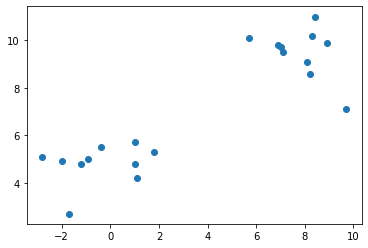

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = [-2,8.2,-0.4,1,5.7,1,9.7,8.3,-2.8,8.9,-1.7,8.1,1.1,1.8,6.9,-1.2,7,8.4,7.1,-0.9]
y = [4.9,8.6,5.5,5.7,10.1,4.8,7.1,10.2,5.1,9.9,2.7,9.1,4.2,5.3,9.8,4.8,9.7,11,9.5,5]
plt.scatter(x,y)

It is pretty obvious that the points on the upper right side of the plane belong to a group in some sense, different from the points on the lower left side. A clustering problem is then to come up with some algorithm that can make such groupings. Additionally, if a new point comes up, the algorithm is also capable of assigning this new point into one of these groups, or clusters, according to the same criteria. One such algorithm is called K-means. Note the code below:

[1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1]


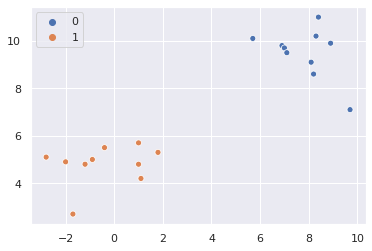

In [3]:
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=2).fit(np.array([x,y]).T)   # don't worry about what these mean
print(clus.labels_)
sns.scatterplot(x,y,hue=clus.labels_)

<p> The T in np.array([x,y]).T means the transpose of the array. The scikit-learn function requires that the training data be in the form of an array of all points [[-2,4.9],[8.2,8.6],[-0.4,5.5],...], so we have to transpose the array [x,y]. But otherwise the code for training a clustering model looks very much like in a classification or regression problem, except it does not have a y in fit - because this is unsupervised learning, it does not have a "correct answer", which is what y is. Also, a train/test split would not make any sense, which is why there isn't it here. </p>
<p> The 20 points are given the labels 0 or 1. The label names are arbitrary, and could change if you run the clustering again, but the relative clustering of the points would not change. And you can see here in using K-means, you must supply the number of clusters, or k, you wish the points are grouped into. Some other algorithms may not require that. </p>
<p> As mentioned above, K-means clustering can also put a new point in one of the clusters according to the same criteria. The function is called predict. Say we want to predict which cluster (5,4) belongs to: </p>

In [17]:
clus.predict([[5,4]])

array([1], dtype=int32)

<p> The algorithm says 1, that is (5,4) belongs to the same cluster as the points labeled 1 in the training data. </p>
<p> Another important clustering algorithm is called agglomerative clustering. As seen below, the syntax is very similar: </p>

In [14]:
from sklearn.cluster import AgglomerativeClustering
clus = AgglomerativeClustering(n_clusters=2).fit(np.array([x,y]).T)
clus.labels_

array([0, 0, 0, 0, 1, 1, 1], dtype=int64)

Now we can try this on a bigger dataset. Using the Iris:

In [7]:
df = sns.load_dataset("iris").drop("Unnamed: 0",axis=1)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df.drop(['Species'],axis=1))
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

We can try to see how the clustering does by doing an example plot of SepalWidth versus SepalLength:

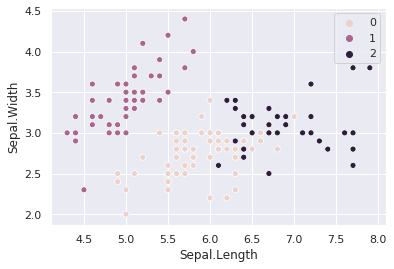

In [10]:
sns.scatterplot(x="Sepal.Length",y="Sepal.Width",data=df,hue=kmeans.labels_)

We can compare it to the actual scattering graph:

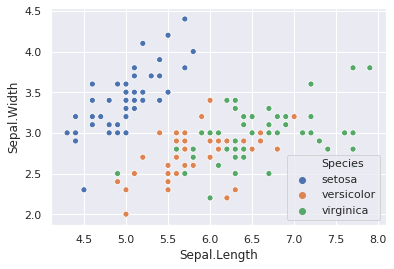

In [11]:
sns.scatterplot(x="Sepal.Length",y="Sepal.Width",data=df,hue="Species")

Exercise: <br>
Use k-means clustering on the wine dataset, k=3. Check the accuracy. Plot the scattering graph of any two attributes of the wine according to the type of wine. Plot the scattering graph of the actual wine classes. Is it possible to tell what type of wine it is by tasting?